In [1]:
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator

In [2]:
# ploting this figure needs raw data that we can't disclose, and we have uploaded the aggregated data that is able to reproduce the figure
Data = pd.read_excel('E:/vcdata/data/ALL_investment.xlsx')
city = Data['city'].drop_duplicates().values
data2 = pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')
city2 = data2['City'].values###得到城市

In [3]:
cityUN=list(set(city2).intersection(set(city))) ###得到两个城市的交集
################# zipf  ######
dsj=Data.groupby(['city',"三级产业名称"], as_index=False)['投资金额(RMB)'].count()
names=Data['三级产业名称'].drop_duplicates().values###获取一级产业名称
names=np.append(names[0:10],names[11:])
###按照城市得到分类
DATA=[]###按照城市对数据进行分组
for li in cityUN:
    dat=dsj[dsj['city'].isin([li])]
    DATA.append(dat)
###得到城市的序列 {产业，1/0}
INDall=[]###得到所有城市的产业序列
for lend in range(len(DATA)):
    col=DATA[lend].shape[0]###得到行数
    indu=[]###得到一级产业的数量
    for ind in names:
        #yinum=0 ###得到产业的数量
        find=0 ###标值是否存在该产业
        for co in range(col):            
            if DATA[lend].iloc[co:co+1,:]['三级产业名称'].values==ind:
                indu.append(DATA[lend].iloc[co:co+1,:]['投资金额(RMB)'].values[0])
                find=1
        if find==0:
            indu.append(0)
    INDall.append(indu)
dfgs=pd.DataFrame(INDall)###将list转化为dataframe

In [4]:
len(cityUN)

254

In [5]:
cityPin = ['suzhou','hangzhou','chengdu','tianjin','nanjing','shanghai','beijing','wuhan','wuxi','shenzhen','guangzhou']
cityCN = ['苏州','杭州','成都','天津','南京','上海','北京','武汉','无锡','深圳','广州']
c=len(cityPin)###一级产业数量
a=list(sns.color_palette("hls", c))
PINcolor = dict(zip(cityCN,a))
dicPIN = {'苏州':'suzhou','杭州':'hangzhou','成都':'chengdu','天津':'tianjin','南京':'nanjing','上海':'shanghai','北京':'beijing','武汉':'wuhan','广州':'guangzhou','无锡':'wuxi','深圳':'shenzhen'}

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


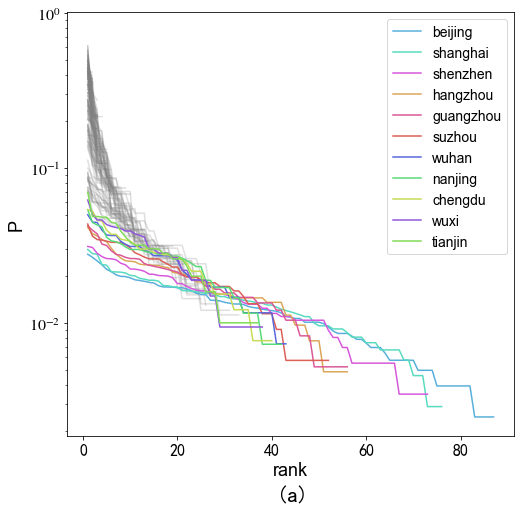

In [21]:
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题

dfgs2=dfgs.fillna(0)
x=np.arange(1,len(names)+1)
fig=plt.figure(figsize=(8,7.8))
ax=fig.add_subplot(111)
for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontproperties('stixgeneral')
plt.tick_params(labelsize=16) #刻度字体大小13
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 14,
    }###设置横纵坐标的字体格式
plt.xlabel('rank',font2)
plt.ylabel('P',font2)
cl = 0###记录大于35的城市的个数，方便读取拼音
x35 = []####记录大于35的城市的值
y35 = []
city35 = []
len35 = []###记录城市还含有的三级产业种类数
for c in range(dfgs2.shape[0]):
    pp=np.log10(dfgs2.iloc[c:c+1,:].values[0])
    pp2=[vv for vv in pp if vv>0]###所有大于0的数
    if len(pp2)>0:
        #avg=sum(pp2)/len(pp2)###所有大于0的数的均值
        avg=sum(pp2)###所有大于0的数的均值
        pp3=pp/avg###频率
    else:
        pp3=pp/1
    cp=dict(zip(names,pp3))
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
    y=[]
    X=[]###保存城市投资产业种类数
    for i in range(len(cpSortList)):
        if cpSortList[i][1]>0:
            y.append(cpSortList[i][1])
            X.append(x[i])
    
    
    if len(X) > 35:
        len35.append(len(X))
        x35.append(X)
        y35.append(y)
        city35.append(cityUN[c])
        cl += 1
    else:
        plt.plot(X[:-1],y[:-1],color='gray',alpha=0.25)
###将三级产业数量大于35的排序
cp35 = dict(zip(city35,len35))
cpSortList35 = sorted( cp35.items(),key = lambda x:x[1],reverse = True)
for mm in range(len(cpSortList35)):
    for nn in range(len(x35)):
        if city35[nn]==cpSortList35[mm][0]:
            plt.plot(x35[nn],y35[nn],color=PINcolor[city35[nn]],label=dicPIN[city35[nn]])#,label=dicPIN[city35[nn]]
plt.text(41,0.0007,'(a)',fontsize=22)
plt.yscale('log')
plt.legend(prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/Fig1d.pdf', bbox_inches='tight')

# plt.text(40,0,'(a)',fontsize=22)
plt.savefig('E:/0论文/2picture/2_6a.png',dpi=500, bbox_inches='tight')